In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#for word processing
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
le = WordNetLemmatizer()
def transform_text(text):
    tag_lis = ['JJ',	'JJR',	'JJS','NNP'	'NNPS',	'RB',	'RBR',	'RBS',	'VB',	'VBG',	'VBD',	'VBN',	'VBP',	'VBZ']
    # tokenize + case lowering
    text = nltk.word_tokenize(text.lower())
    # pos tagging
    ps = nltk.pos_tag(text)
    y = list()
    text.clear()
    for x,z in ps:
       if z in tag_lis:
           y.append(x)
    text = y[:]
    y.clear()
    # isalpha checking 
    for i in text:
        if i.isalpha():
            # stopwords + punctuation removing + Lemmatization
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(le.lemmatize(i,pos = 'v'))
    return " ".join(y)

In [11]:
lb = LabelEncoder()
df = pd.read_csv('./Datasets/data_processed.csv')
df = df[['reviewText','label']]
sentences = list(df['reviewText'].astype(str))
labels = lb.fit_transform(list(df['label']))

In [12]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences,labels,test_size=0.3, random_state=5000)

In [13]:
vocab_size = 50000
embedding_dim = 16
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
print(training_padded.shape)

(49896, 150)


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 16)           800000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 60)                1020      
                                                                 
 dense_5 (Dense)             (None, 20)                1220      
                                                                 
 dense_6 (Dense)             (None, 8)                 168       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [25]:
num_epochs = 3
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/3
1560/1560 - 15s - loss: 0.4384 - accuracy: 0.8011 - val_loss: 0.3896 - val_accuracy: 0.8313 - 15s/epoch - 9ms/step
Epoch 2/3
1560/1560 - 15s - loss: 0.3255 - accuracy: 0.8618 - val_loss: 0.3858 - val_accuracy: 0.8365 - 15s/epoch - 10ms/step
Epoch 3/3
1560/1560 - 15s - loss: 0.2790 - accuracy: 0.8851 - val_loss: 0.4097 - val_accuracy: 0.8334 - 15s/epoch - 10ms/step


In [26]:
res = model.evaluate(testing_padded, testing_labels)
print("Accuracy : ",round(res[1]*100,0))

669/669 [==============================] - 1s 2ms/step - loss: 0.4097 - accuracy: 0.8334
Accuracy :  83.0


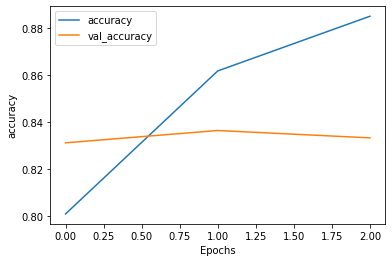

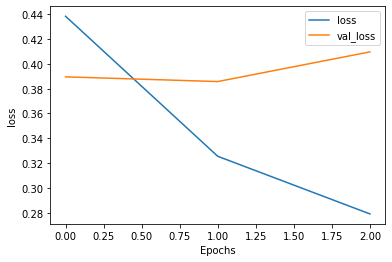

In [27]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
print()
plot_graphs(history, "loss")

In [15]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#for word processing
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# IMP Variables
vocab_size = 50000
embedding_dim = 16
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
# Saving important objects
import pickle
pickle.dump(tokenizer,open('./Model/tokenizer.pkl','wb'))
model.save('./Model/ann.h5')

In [16]:
tokenizer = pickle.load(open('./Model/tokenizer.pkl','rb'))
model = tf.keras.models.load_model('./Model/ann.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           800000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 60)                1020      
                                                                 
 dense_1 (Dense)             (None, 20)                1220      
                                                                 
 dense_2 (Dense)             (None, 8)                 168       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                        

In [28]:
def predi(text):
    text = transform_text(text)
    sentence = [text]
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    result = model.predict(padded)
    res = round((result[0])[0],0) 
    return int(res)

In [33]:
print(predi('This is very good product'))
print(predi('This is very bad product'))
print(predi('Such a bad product'))
print(predi('Same old player. Not worth the additional money.The web browser is a joke. Thats why I took it back. It is pretty much useless.'))

0
0
0
0
